### 凸包可视化示意

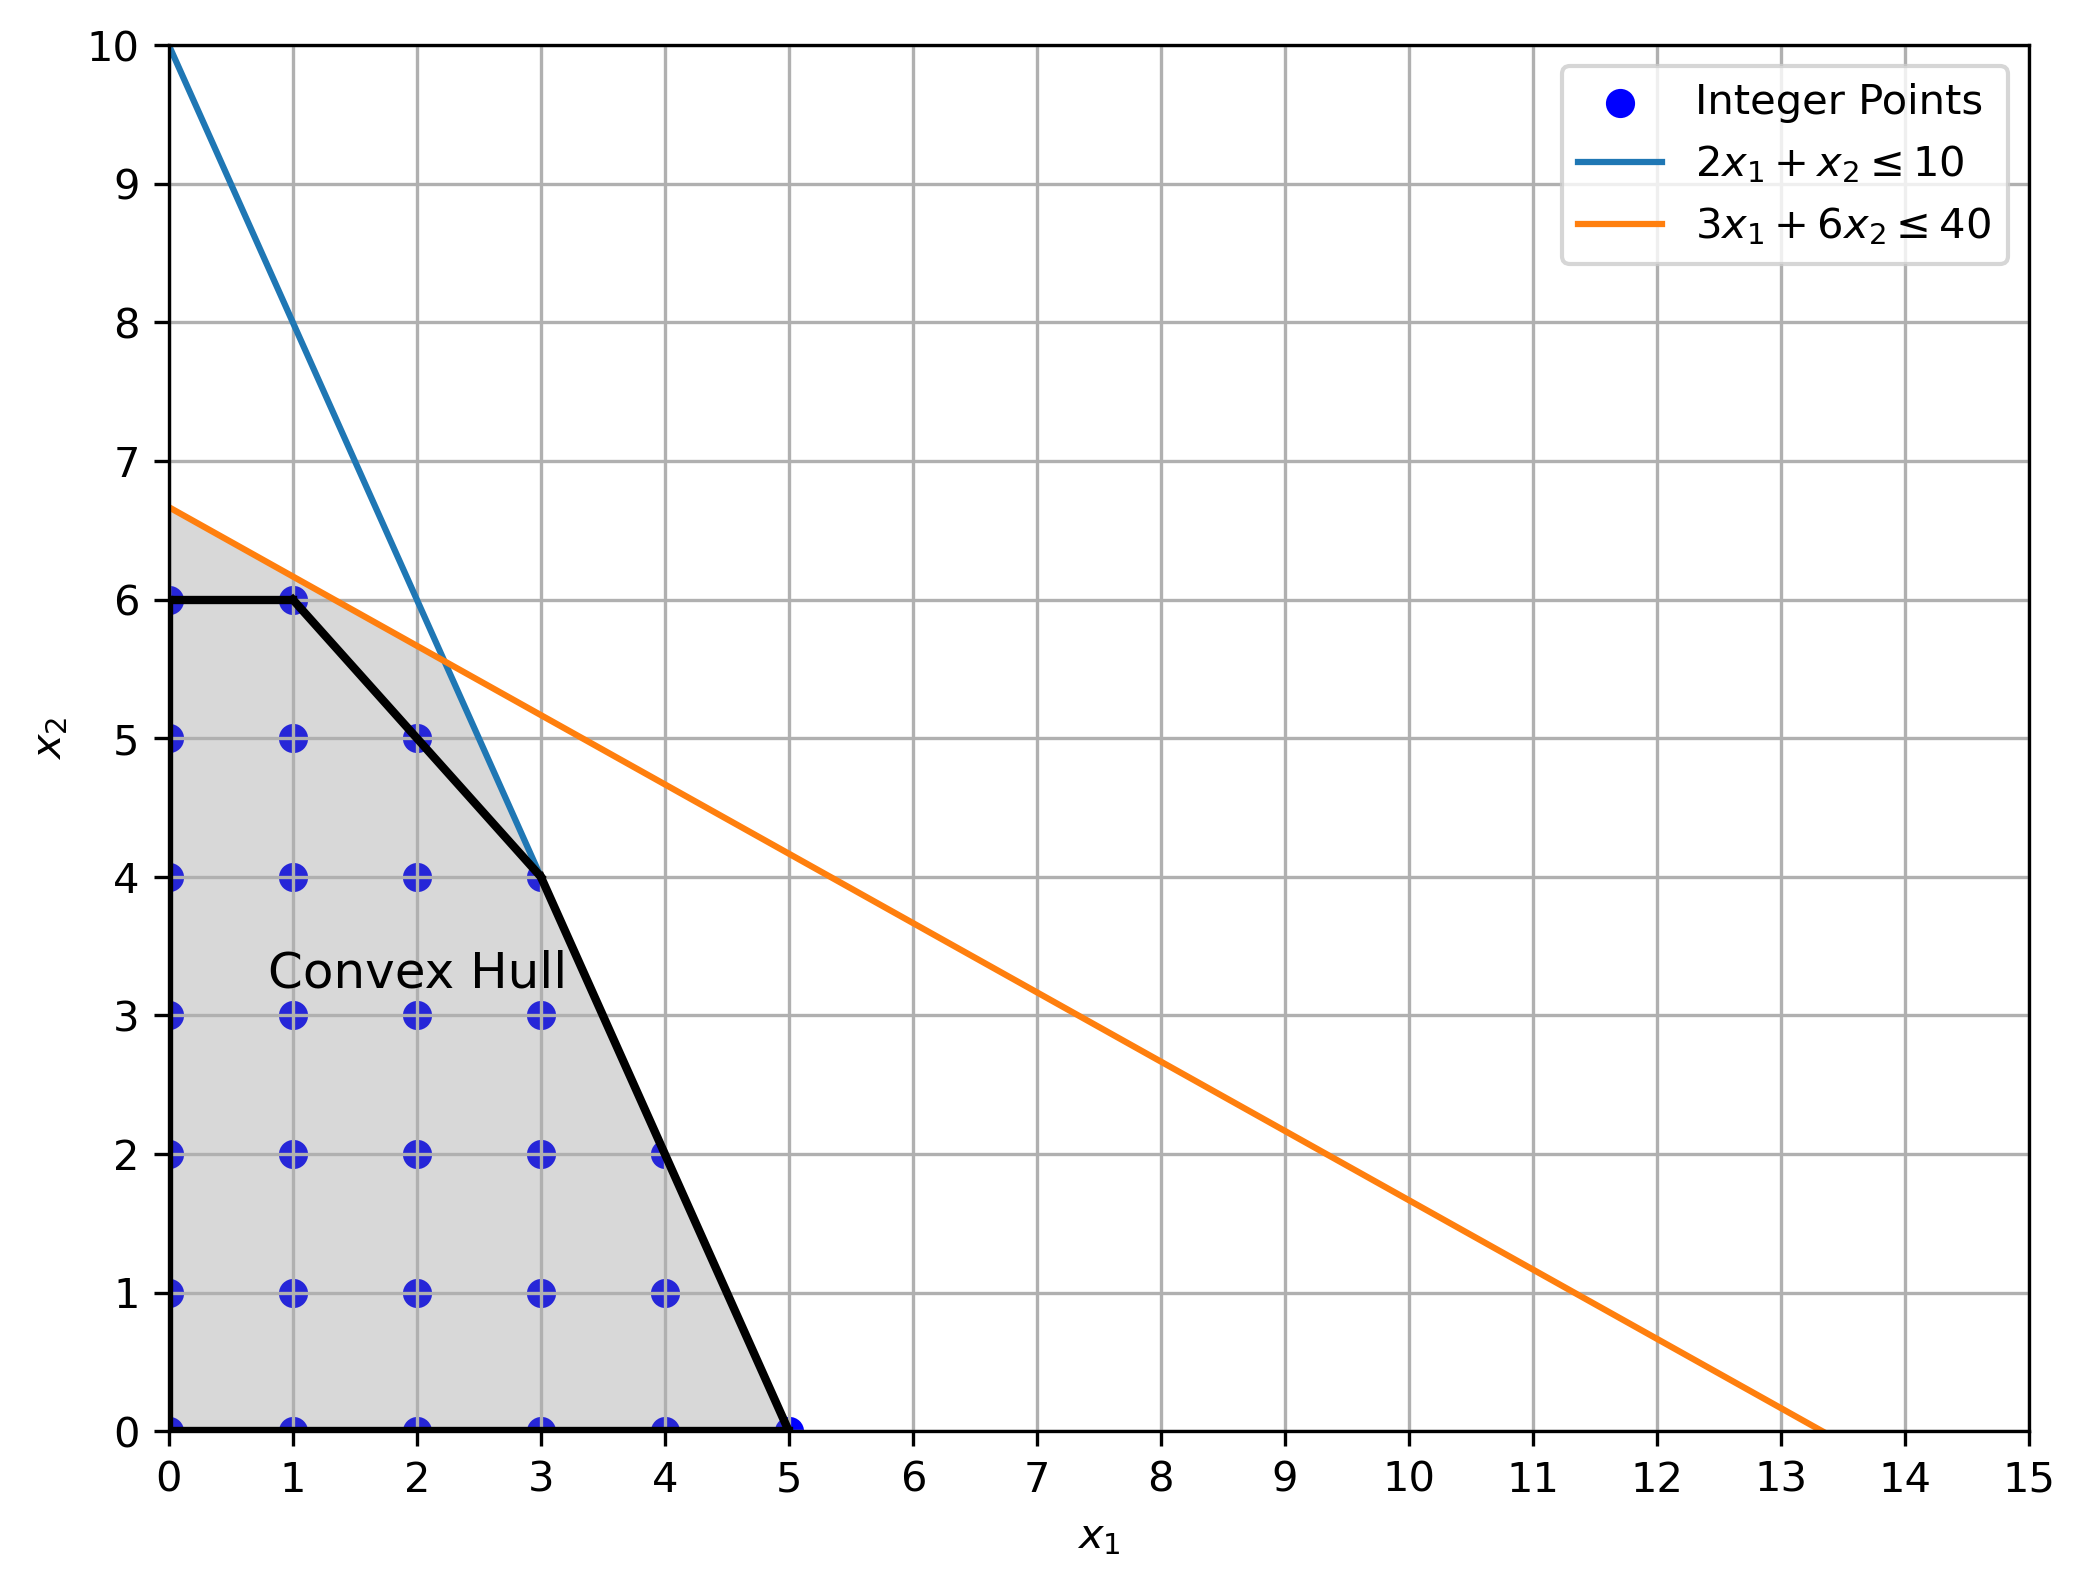

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# 定义约束条件中的不等式
x = np.linspace(0, 20, 400)
y1 = 10 - 2 * x
y2 = (40 - 3 * x) / 6

# 计算可行域内的整数点
integer_points = [(x_int, y_int) for x_int in range(0, 6) for y_int in range(0, 11) if (2 * x_int + y_int <= 10 and 3 * x_int + 6 * y_int <= 40)]
x_integers, y_integers = zip(*integer_points)

# 创建点集
points = np.array(list(zip(x_integers, y_integers)))

# 计算凸包
hull = ConvexHull(points)

# 绘制凸包图形
plt.figure(figsize=(8, 6),dpi = 300)

# 绘制整数规划可行域内的点
plt.scatter(x_integers, y_integers, color='blue', label='Integer Points')
plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 10$')
plt.plot(x, y2, label=r'$3x_1 + 6x_2 \leq 40$')

# 填充可行域 - x2 <= 5
plt.fill_between(x, 0, y1, where=(y1*y2 >= 0) & (x <= 5), color='gray', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 >= 0) & (y2 >= 0) & (x <= 5), color='white')

# 绘制凸包的边界线（加粗）
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=2)

# 添加 x, y 轴标签
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 添加图例
plt.legend()

# 设置坐标轴刻度基本单位为 1
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 11, 1))
# 设置 x, y 轴范围
plt.xlim((0, 15))
plt.ylim((0, 10))

# 在图中添加凸包说明
plt.text(0.8, 3.2, 'Convex Hull', color='black', fontsize=12)

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


### 原问题可行域

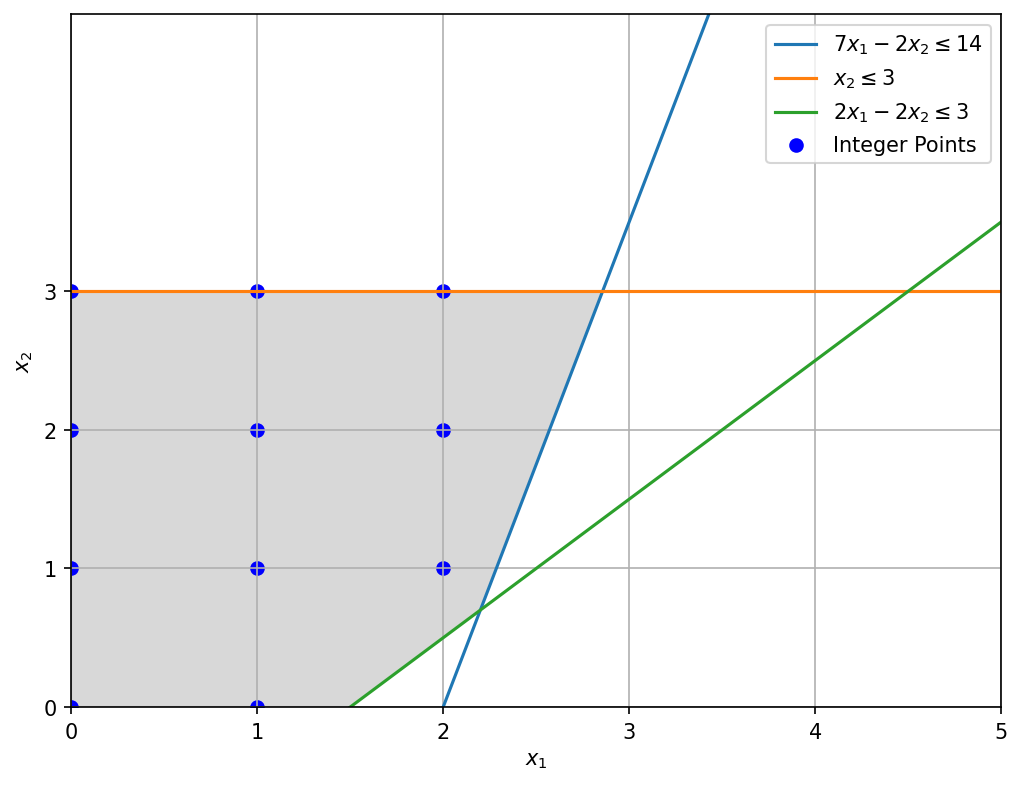

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 定义约束条件中的不等式
x = np.linspace(0, 10, 400)
y1 = (7 * x - 14) / 2
y2 = 3 - 0* x
y3 = (2 * x - 3) / 2

# 绘制不等式
plt.figure(figsize=(8, 6), dpi=150)

plt.plot(x, y1, label=r'$7x_1 - 2x_2 \leq 14$')
plt.plot(x, y2, label=r'$x_2 \leq 3$')
plt.plot(x, y3, label=r'$2x_1 - 2x_2 \leq 3$')

# 添加 x, y 轴标签
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 设置 x, y 轴范围
plt.xlim((0, 5))
plt.ylim((0, 5))

# 填充可行域
# plt.fill_between(x, 0, y1, where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)
plt.fill_between(x, 0, y2, color='gray', alpha=0.3)


plt.fill_between(x, 0, y3, color='white')
plt.fill_between(x, y1, y3, color='white')

# 找到可行域内的整数点并标注
integer_points = [(x_int, y_int) for x_int in range(0, 6) for y_int in range(0, 4) if (7 * x_int - 2 * y_int <= 14 and y_int <= 3 and 2 * x_int - 2 * y_int <= 3)]
x_integers, y_integers = zip(*integer_points)

# 在可行域内的整数点上做标注
plt.scatter(x_integers, y_integers, color='blue', marker='o', label='Integer Points')

# 添加图例
plt.legend()

# 设置坐标轴刻度基本单位为 1
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 4, 1))

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


### 子问题1求解

In [24]:
import gurobipy as gp
from gurobipy import GRB

try:
    # 创建模型
    model = gp.Model("integer_programming")

    # 创建变量
    x1 = model.addVar(vtype=GRB.CONTINUOUS, name="x1")
    x2 = model.addVar(vtype=GRB.CONTINUOUS, name="x2")
    x3 = model.addVar(vtype=GRB.CONTINUOUS, name="x3")
    x4 = model.addVar(vtype=GRB.CONTINUOUS, name="x4")
    x5 = model.addVar(vtype=GRB.CONTINUOUS, name="x5")

    # 设置变量系数
    model.setObjective(4 * x1 - x2, sense=GRB.MAXIMIZE)

    # 添加约束
    model.addConstr(7 * x1 - 2 * x2 + x3 == 14, "c0")
    model.addConstr(x2 + x4 == 3, "c1")
    model.addConstr(2 * x1 - 2 * x2 + x5 == 3, "c2")

    # 求解模型
    model.optimize()

    # 输出结果
    print(f"Optimal objective value: {model.objVal}")

    for v in model.getVars():
        print(f"{v.varName}: {v.x}")

except gp.GurobiError as e:
    print(f"Gurobi error occurred: {e}")
except AttributeError:
    print("Attribute error occurred")


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 5 columns and 8 nonzeros
Model fingerprint: 0x0895711d
Coefficient statistics:
  Matrix range     [1e+00, 7e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 1e+01]
Presolve removed 1 rows and 3 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.4305000e+00   1.350000e-02   0.000000e+00      0s
       1    8.4285714e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.428571429e+00
Optimal objective value: 8.428571428571429
x1: 2.857142857142857
x2: 3.0
x3: 0.0
x4: 0.0
x5: 3.2857142857142865


### 子问题2

In [26]:
import gurobipy as gp
from gurobipy import GRB

try:
    # 创建模型
    model = gp.Model("linear_programming")

    # 创建变量
    x1 = model.addVar(vtype=GRB.CONTINUOUS, name="x1")
    x2 = model.addVar(vtype=GRB.CONTINUOUS, name="x2")
    x3 = model.addVar(vtype=GRB.CONTINUOUS, name="x3")
    x4 = model.addVar(vtype=GRB.CONTINUOUS, name="x4")
    x5 = model.addVar(vtype=GRB.CONTINUOUS, name="x5")
    s = model.addVar(vtype=GRB.CONTINUOUS, name="s")

    # 设置变量系数
    model.setObjective(4 * x1 - x2, sense=GRB.MAXIMIZE)

    # 添加约束
    model.addConstr(x1 + (1/7) * x3 + (2/7) * x4 == 20/7, "c0")
    model.addConstr(x2 + x4 == 3, "c1")
    model.addConstr((-2/7) * x3 + (10/7) * x4 + x5 == 23/7, "c2")
    model.addConstr((1/7) * x3 + (2/7) * x4 - s == 6/7, "c3")

    # 求解模型
    model.optimize()

    # 输出结果
    print(f"Optimal objective value: {model.objVal}")

    for v in model.getVars():
        print(f"{v.varName}: {v.x}")

except gp.GurobiError as e:
    print(f"Gurobi error occurred: {e}")
except AttributeError:
    print("Attribute error occurred")


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 6 columns and 11 nonzeros
Model fingerprint: 0xae7677ec
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-01, 3e+00]
Presolve removed 1 rows and 3 columns
Presolve time: 0.01s
Presolved: 3 rows, 3 columns, 7 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.4285714e+00   8.571429e-01   0.000000e+00      0s
       2    7.5000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.500000000e+00
Optimal objective value: 7.500000000000002
x1: 2.0000000000000004
x2: 0.5000000000000004
x3: 1.0000000000000004
x4: 2.4999999999999996
x5: 0.0
s: 0

### 子问题2约束等价变换

In [27]:
import numpy as np

# 定义系数矩阵 A 和右侧常数向量 b
A = np.array([
    [1, 0, 1/7, 2/7, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, -2/7, 10/7, 1, 0],
    [0, 0, 1/7, 2/7, 0, -1]
])

b = np.array([
    20/7,
    3,
    23/7,
    6/7
])

B = A[:,:4]
N = A[:,4:]
# 打印系数矩阵 A 和右侧常数向量 b
print("系数矩阵 A：")
print(A)

print("\n右侧常数向量 b：")
print(b)


系数矩阵 A：
[[ 1.          0.          0.14285714  0.28571429  0.          0.        ]
 [ 0.          1.          0.          1.          0.          0.        ]
 [ 0.          0.         -0.28571429  1.42857143  1.          0.        ]
 [ 0.          0.          0.14285714  0.28571429  0.         -1.        ]]

右侧常数向量 b：
[2.85714286 3.         3.28571429 0.85714286]


In [31]:
np.dot(np.linalg.inv(B),N)

array([[ 0. ,  1. ],
       [-0.5,  1. ],
       [-1. , -5. ],
       [ 0.5, -1. ]])

In [32]:
np.dot(np.linalg.inv(B),b)

array([2. , 0.5, 1. , 2.5])

### 子问题3求解

In [33]:
import gurobipy as gp
from gurobipy import GRB

try:
    # 创建模型
    model = gp.Model("linear_programming")

    # 创建变量
    x1 = model.addVar(vtype=GRB.CONTINUOUS, name="x1")
    x2 = model.addVar(vtype=GRB.CONTINUOUS, name="x2")
    x3 = model.addVar(vtype=GRB.CONTINUOUS, name="x3")
    x4 = model.addVar(vtype=GRB.CONTINUOUS, name="x4")
    x5 = model.addVar(vtype=GRB.CONTINUOUS, name="x5")
    s = model.addVar(vtype=GRB.CONTINUOUS, name="s")
    s1 = model.addVar(vtype=GRB.CONTINUOUS, name="s1")

    # 设置变量系数
    model.setObjective(4 * x1 - x2, sense=GRB.MAXIMIZE)

    # 添加约束
    model.addConstr(x1 + s == 2, "c0")
    model.addConstr(x2 - (1/2) * x5 + s == 1/2, "c1")
    model.addConstr(x3 - x5 - 5 * s == 1, "c2")
    model.addConstr(x4 + (1/2) * x5 - s == 5/2, "c3")
    model.addConstr((1/2) * x5 - s1 == 1/2, "c4")

    # 求解模型
    model.optimize()

    # 输出结果
    print(f"Optimal objective value: {model.objVal}")

    for v in model.getVars():
        print(f"{v.varName}: {v.x}")

except gp.GurobiError as e:
    print(f"Gurobi error occurred: {e}")
except AttributeError:
    print("Attribute error occurred")


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 5 rows, 7 columns and 13 nonzeros
Model fingerprint: 0x4d3218dc
Coefficient statistics:
  Matrix range     [5e-01, 5e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 3e+00]
Presolve removed 3 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+00   1.000000e+00   0.000000e+00      0s
       1    7.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.000000000e+00
Optimal objective value: 7.0
x1: 2.0
x2: 1.0
x3: 2.0
x4: 2.0
x5: 1.0
s: 0.0
s1: 0.0
